# 10907-01 - Pattern Recognition




# Recitation 1: Introduction to Linear Algebra and Probability with Python
Week 1: Wed Sep 18. 2023

Lecture page: https://sada.dmi.unibas.ch/en/teaching/Pattern-Recognition

Lecturer
Prof. Dr. Ivan Dokmanić: ivan.dokmanic@unibas.ch

 
Teaching assistants: Alexandra Flora Spitzer: alexandra.spitzer@stud.unibas.ch; Roman Fries:r.fries@unibas.ch ; Cheng Shi: cheng.shi@unibas.ch; Vinith Kishore: vinith.kishore@unibas.ch; Valentin Debarnot: valentin.debarnot@unibas.ch

## Outlines
- [#Linear algebra](#Linear_algebra)
    - Vectors, matrices and vectors space
    - Angle between vectors and orthogonality
    - Projection and projection matrix
    - Visualizing matrix product by python
- [#Probability](#Probability)
    - Random variable and random vector
    - Joint and conditional distribution, independence and dependence.
    - Variance and covariance
    - Normal distribution and multivariate normal distribution
- [#Additional Learning Material](#Additional)
    - QR decomposition
    - Cholesky decomposition 
    - Use Cholesky decomposition to sample from multivariate gaussian distribution

<a id='Linear_Algebra'></a>
## Linear Algebra


* numpy library is used for linear algebra in python

* matplotlib library is used for visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Vectors and matrices

$x=\begin{bmatrix}1 \\2 \\3 \end{bmatrix} \Bigg\}   $ By convention, vectors are column vectors  
  

$A= \begin{bmatrix} 1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9 \end{bmatrix} \Bigg\} $  By convention, matrices are 2D arrays or vectors stacked in columns 

In [2]:
x=np.array([[1],
            [2],
            [3]]) 
print(x)
print('The shape of the vector x is', x.shape, '--> 3 rows, 1 column')
A=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
print(A)
print('The shape of the matrix A is', A.shape, '--> 3 rows, 3 columns')

[[1]
 [2]
 [3]]
The shape of the vector x is (3, 1) --> 3 rows, 1 column
[[1 2 3]
 [4 5 6]
 [7 8 9]]
The shape of the matrix A is (3, 3) --> 3 rows, 3 columns


* Initialize the x without the square brackets will gives us a vector with shape (3,). This is not a column vector. We can use x.reshape(3,1) to reshape it to a column vector.

### Rank of a Matrix

* The rank of a matrix is the dimension of the column space, which is the maximum number of linearly independent column vectors in the matrix.
* In numpy, the rank can be computed using np.linalg.matrix_rank(your_matrix).


In [3]:
M=np.array([[1,2,2],
            [2,5,4],
            [3,8,6]])
rank_M = np.linalg.matrix_rank(A)
print('Rank of matrix M=',rank_M, 'because only two columns are linearly independent.')
print('To see the linear dependence of the first and third column, multiply the first column by 2... ;) ')

Rank of matrix M= 2 because only two columns are linearly independent.
To see the linear dependence of the first and third column, multiply the first column by 2... ;) 


### Products

**Scalar product:** 

Lets look at the simple example: 

For vector $x=\begin{bmatrix} x_1 \\  x_2 \\ x_3 \end{bmatrix}$

Multiply each element of x by 2 :

$2x =\begin{bmatrix} 2x_1 \\ 2x_2 \\ 2x_3 \end{bmatrix}$

**Implementation**
* numpy does this automatically for us without using for loop
* $2x$ is the same as $x*2$ in numpy

In [4]:
print(2*x)
print('-----')
print(x*2)

[[2]
 [4]
 [6]]
-----
[[2]
 [4]
 [6]]


**Matrix product:**
 * Same Matrices : $AA$
* Different Matrices : $AB$ 
    
    * only possible if the number of columns of $A$ is equal to the number of rows of $B$.
<img src="./img/matrix_multiplication.png" alt="Drawing" style="width: 400px;"/>

 **Implementation**
 * Use the @ operator for matrix multiplication.
 * There is also a function np.matmul() which does the same thing as @ operator.
 * Common error message: dimension mismatch! Make sure the dimensions of the matrices are compatible for multiplication.

In [5]:
print(A@A)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


**Dot product:** 

$<x,y>=x^\top y$

For $x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\x_n \end{bmatrix}$ and $y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_n \end{bmatrix}$

$<x,y> = x_1y_1 + x_2y_2 + \dots + x_ny_n$

The dot product is an operation that takes two vectors and returns a single scalar value.

**Implementation**
* You can use np.dot() in the NumPy library to compute the dot product.
* Provided the dimensions of the vectors are compatible for the dot product you can use @ operator for dot product as well.

In [6]:
x=np.array([[1],
            [2],
            [3]]) 
y=np.array([[3],
            [2],
            [1]])
print('shape of x is',x.shape, 'and shape of y is', y.shape, '--> 2D arrays')
print(np.dot(x.T,y))
print(x.T@y)
#If you want to get the scalar value without the square brackets you can reshape the 2D arrays into 1D arrays 
print(np.dot(x.reshape(-1),y.reshape(-1)))

shape of x is (3, 1) and shape of y is (3, 1) --> 2D arrays
[[10]]
[[10]]
10


### Geometric point of view on vectors and dot products


The geometric definition of the dot product is the following:

>  $\left<x,y\right>=\left|x\right|\left|y\right| \cos(\theta(x,y))$

$\left|x\right|$ and $\left|y\right|$ are the magnitudes, i.e. the lengths, of the vectors $x$ and $y$ and $\theta(x,y)$ is the angle between the two vectors.


> "Same" direction: $\cos(\theta(x,y))>0$ 
>
> "Opposite" direction: $\cos(\theta(x,y))<0$
>
> "Orthogonal": $\cos(\theta(x,y))=0$ 

**Implementation**
* Use np.arccos() for inverse cosine function, this will give the angle in radians.
* Use np.degrees() to convert the angle from radians to degrees, or use multiply by 180/np.pi to convert the angle from radians to degrees.

cos(theta): [[-1.]]
theta: [[179.99999879]]


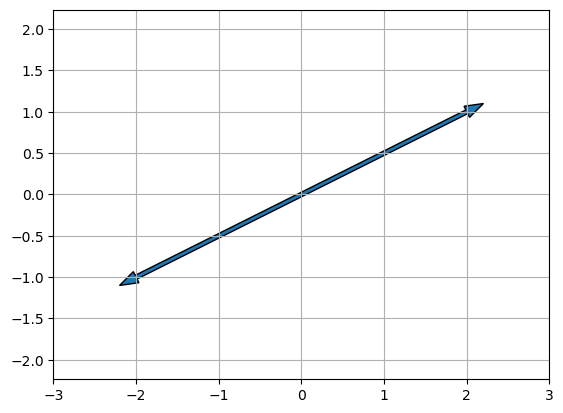

In [7]:
#plot vectors at a 90 degree angle to each other 
import matplotlib.pyplot as plt
#x=np.array([[1],[2]])
x=np.array([[2],[1]])
#y=np.array([[-2],[1]])
y=np.array([[-2],[-1]])
plt.grid('on')
plt.arrow(0,0,x[0][0],x[1][0],width = 0.05)
plt.arrow(0,0,y[0][0],y[1][0],width = 0.05)
plt.axis('equal')
plt.xlim([-3,3])
plt.ylim([-3,3])
cosTheta=x.T@y/(np.linalg.norm(x)*np.linalg.norm(x))
print('cos(theta):',cosTheta)
print('theta:',np.arccos(cosTheta)/np.pi*180)

### Vector spaces

> **_Definition:_**  Let $V$ be a set on which two operations (vector
addition and scalar multiplication) are defined. If the listed $10$ axioms
are satisfied for every $u$, $v$, $w$ in $V$ and scalars $c$ and $d$, then $V$ is called
a vector space (over the real space $\mathbb{R}$).
>    1. $u + v$ is a vector in $V$ (Closure under addition).
>
>    2. $u + v$ = $v + u$ (Commutative property of addition ).
>
>    3. $(u+v)+w = u+ (v+w)$ (Associative property of addition).
>
>    4. There is a zero vector $0$ in $V$ such that for every $u$ in $V$ we have $(u + 0) = u$ (Additive identity).
>
>    5. For every $u$ in $V$ , there is a vector in V denoted by −u such that $u + (−u) = 0$ (Additive inverse).
>
>    6. $cu$ is in $V$ (Closure under scalar multiplication).
>
>    7. $c(u + v) = cu + cv$ (Distributive property of scalar mult.).
>
>    8. $(c + d)u = cu + du$ (Distributive property of scalar mult.).
>
>    9. $c(du) = (cd)u$ (Associate property of scalar mult.).
>
>    10. $1(u) = u$ (Scalar identity property).

### Linear combination and spanning sets

Linear Combination:
>A vector $v$ in a vector space $V$ is called a linear combination of vectors $u_1, u_2, . . . , u_k$ in $V$ if $v$ can be written in the form
>$$v = c_1u_1 + c_2u_2 + · · · + c_ku_k,$$
>where $c_1, c_2,\ldots,c_k$ are scalars.

Span:

>Let $V$ be a vector space over $\mathbb{R}$ and $S = \{v_1, v_2, . . . , v_k\}$ be a subset of V. Then the span of $S$ is the set of all linear combinations of vectors in $S$,

$$span(S) = \{c_1v_1 + c_2v_2 + · · · + c_kv_k : c_1, c_2, . . . , c_k \text{  are scalars}\}.$$



<img src="./img/2nonparr.png" alt="Drawing" style="width: 400px;"/>

**Implementation**
* We can use + and * operators for vector addition and scalar multiplication respectively.

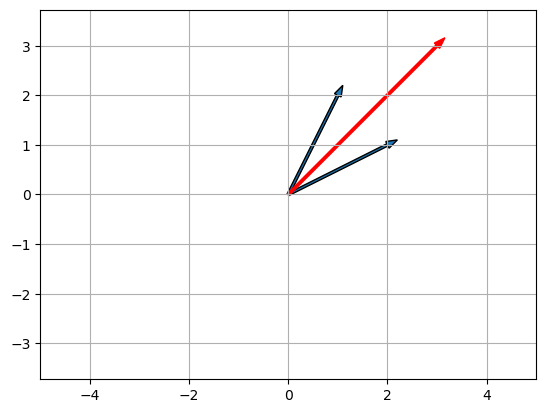

In [8]:
#Closure under addition
import matplotlib.pyplot as plt
x=np.array([[1],[2]])
y=np.array([[2],[1]])
z=x+y
plt.grid('on')
plt.arrow(0,0,x[0][0],x[1][0],width = 0.05)
plt.arrow(0,0,y[0][0],y[1][0],width = 0.05)
plt.arrow(0,0,z[0][0],z[1][0],width = 0.05,color='red')
plt.axis('equal')
plt.xlim([-5,5])
plt.ylim([-5,5])
print()

### Projection of a vector onto a line


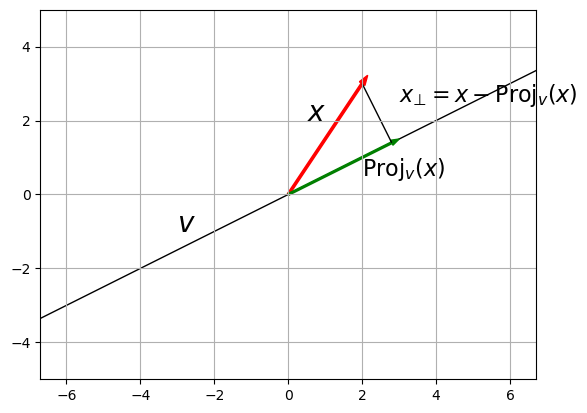

In [9]:
import matplotlib.pyplot as plt
x=np.array([[2],[3]])
v=np.array([[100],[50]])
plt.grid('on')
plt.arrow(0,0,x[0][0],x[1][0],width = 0.06,color='r')
plt.arrow(-v[0][0],-v[1][0],2*v[0][0],2*v[1][0],width = 0.0)
t=(v.T@x/np.linalg.norm(v)**2).item()
plt.arrow(0,0,t*v[0][0],t*v[1][0],width = 0.05,color='g')

plt.arrow(t*v[0][0],t*v[1][0],x[0][0]-t*v[0][0],x[1][0]-t*v[1][0],width = 0.0)
plt.text(0.5,2,r'$x$',fontsize=20)
plt.text(2,0.5,r'$\mathrm{Proj}_v(x)$',fontsize=16)
plt.text(3,2.5,r'$x_{\bot}=x-\mathrm{Proj}_v(x)$',fontsize=16)
plt.text(-3,-1,r'$v$',fontsize=20)
plt.axis('equal')
plt.xlim([-5,5])
plt.ylim([-5,5])

print()

We can compute the projection easily with projection matrix:
$$
\mathrm{Proj}_\mathrm{v}(x)=Px
$$

>Derivation for the projection matrix $P$: 
>
>We want to find the projection of $x$ onto v. This projection is a vector that lies on the line defined by v. So, it's some scalar multiple of v. Let's call this scalar $c$. Thus, the projection is $c$v. Due to the orthogonality between $x_\bot$ and $\mathrm{Proj}_\mathrm{v}(x)$, we have
>$$
c\mathrm{v}^\top (x-\mathrm{v})=0.
$$
>So we get,
>$$
c=\frac{\mathrm{v}^\top x}{\mathrm{v}^\top \mathrm{v}}.
$$
>Finally, substituting $c$ in the definition of the projection, we have
$$
\mathrm{Proj}_\mathrm{v}(x)=Px=c\mathrm{v}= \mathrm{v} \frac{\mathrm{v}^\top x}{\mathrm{v}^\top \mathrm{v}}=\left(\frac{\mathrm{v} \mathrm{v}^\top }{\mathrm{v}^\top \mathrm{v}}\right) x.
$$


In [10]:
# Test the projection matrix
v=np.array([[100],[50]])
P=v@v.T/(v.T@v)

the red vector is the vector we want to project on v
the green vector is the desired projection vector


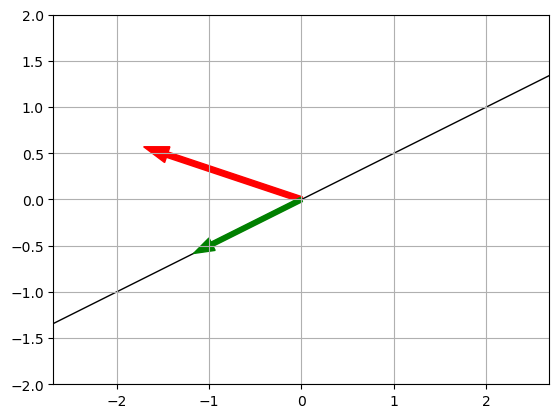

In [11]:
import matplotlib.pyplot as plt
x=np.random.randn(2,1)
y=P@x
plt.grid('on')
plt.arrow(0,0,x[0][0],x[1][0],width = 0.06,color='r')
plt.arrow(-v[0][0],-v[1][0],2*v[0][0],2*v[1][0],width = 0.0)
plt.arrow(0,0,y[0][0],y[1][0],width = 0.05,color='g')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-2,2])

print('the red vector is the vector we want to project on v')
print('the green vector is the desired projection vector')

## Key take-home message

> *Vectors and Matrices:*
>
>* Vectors are typically column vectors.
>* Matrices are 2D arrays or stacked vectors.

> *Rank of a matrix:*
>* The rank of a matrix = maximum number of linearly independent column vectors in the matrix.
>* Use np.linalg.matrix_rank(your_matrix) to calculate it.


> *Matrix Product:*
>
>* Matrix multiplication requires compatible dimensions.
>* Use the @ operator or np.matmul() in numpy.

>*Dot Product:*
>
>* Represented as $<x,y>=x^\top y$
>* Geometrically, it involves the angle between two vectors.
>* Use np.dot() or the @ operator in numpy.

>*Linear Combination and Spanning Sets:*
>
>* A vector is a linear combination if it's a sum of scalar multiples of other vectors.
>* The span is all possible linear combinations of a set of vectors.
>* Projections can be computed using $\mathrm{Proj}_\mathrm{v}(x)=Px=c\mathrm{v}= \mathrm{v} \frac{\mathrm{v}^\top x}{\mathrm{v}^\top \mathrm{v}}=\left(\frac{\mathrm{v} \mathrm{v}^\top }{\mathrm{v}^\top \mathrm{v}}\right) x.$


### Linear operators

For $y=Ax$, we can regard $A$ as an operator.

* An operator is matrix that "acts" on a vector and scales and rotates it.


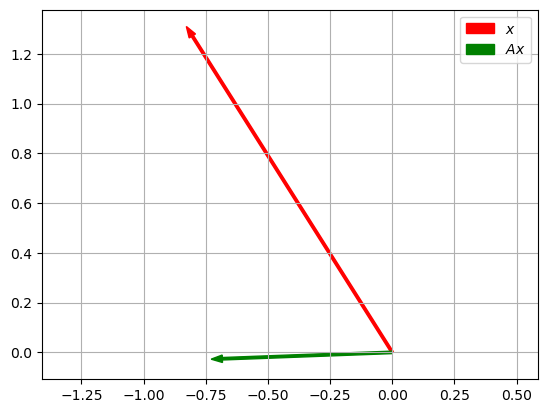

In [12]:
x = np.random.rand(2,1)
A = np.random.randn(2, 2)
# assume A is symmetric
A =A + A.T
y=A@x

import matplotlib.pyplot as plt
x=np.random.randn(2,1)

plt.grid('on')
plt.arrow(0,0,x[0][0],x[1][0],width = 0.01,color='r',label=r'$x$')
plt.arrow(0,0,y[0][0],y[1][0],width = 0.01,color='g',label=r'$Ax$')
plt.axis('equal')
plt.legend()
#plt.xlim([-4,4])
#plt.ylim([-4,4])
print()

### Eigen decomposition
Eigenvalue and eigenvector
$$
Av_i=\lambda_i v_i
$$
The idea is that when matrix $A$ acts on its eigenvector $v_i$, the result is just a scaled version of $v_i$ and the scaling factor is $\lambda_i$.

The eigen decompoistion of can be written in matrix form as
$$
A=V \Lambda V^\top.  
$$
> A is the matrix we're decomposing. 
>
> $V$ is the matrix whose columns are the eigenvectors of A: $V = \begin{bmatrix}v_1, v_2 \cdots, v_n \end{bmatrix}$
>
> $\Lambda$ is a diagonal matrix where the diagonal entries are the eigenvalues of A.
>
>$$ \Lambda  = \begin{bmatrix} \lambda_1, & 0, &0, & \cdots, &0 \\ 0, & \lambda_2,&0,& \cdots,&0, \\\vdots \\ 0,&0,&0, & \cdots, &\lambda_n \end{bmatrix} $$

Because of the eigen decomposition, we can naturally break down the action of the linear operator $A$ on $x$ into $3$ steps: rotate $V^\top$, scale $\Lambda$, and rotate $V$ 
$$
Ax=V \left(\Lambda \left(V^\top x\right)\right).
$$

**Implementation**
* np.linalg has various functions for matrix decomposition.
* np.linalg.eig() returns the eigenvalues and eigenvectors of a matrix.
* Since $\Lambda$ is a diagonal matrix, we can use np.diag() to create a diagonal matrix from a vector.


In [13]:
#calculate the eigenvalue matrix Lambda and the eigenvector matrix V of A
Lambda, V = np.linalg.eig(A)
Lambda=np.diag(Lambda)
Lambda

array([[-0.66841051,  0.        ],
       [ 0.        ,  3.54693669]])

**Lets compare the eigen decomposition with the original matrix multiplication**

In [14]:
# The original Matrix
A

array([[ 0.93956893, -2.04758241],
       [-2.04758241,  1.93895725]])

In [15]:
# The matrix using the eigenvalues and eigenvectors
V@Lambda@V.T

array([[ 0.93956893, -2.04758241],
       [-2.04758241,  1.93895725]])

In [16]:
A@x

array([[-3.35943866],
       [ 4.11187586]])

In [17]:
V@Lambda@V.T@x

array([[-3.35943866],
       [ 4.11187586]])

As you can see, the results are identical! 

**Visualizing matrix product by python**

 Note that for any scalar $c$, we have if $y = Ax$ then $\hat{y} = A(cx) = c(Ax) = cy$. So by knowing the effect of $A$ on $x$, we can easily know the effect of $A$ on $cx$.  This is due to the linearity of the operator $A$.

 Lets look at the effect of a $2\times 2$  matrix  $A$ on a unit circle. This will give us a better understanding of the effect of the matrix on the entire space, as any vector on the place is a scalar multiple of a vector on the unit circle.

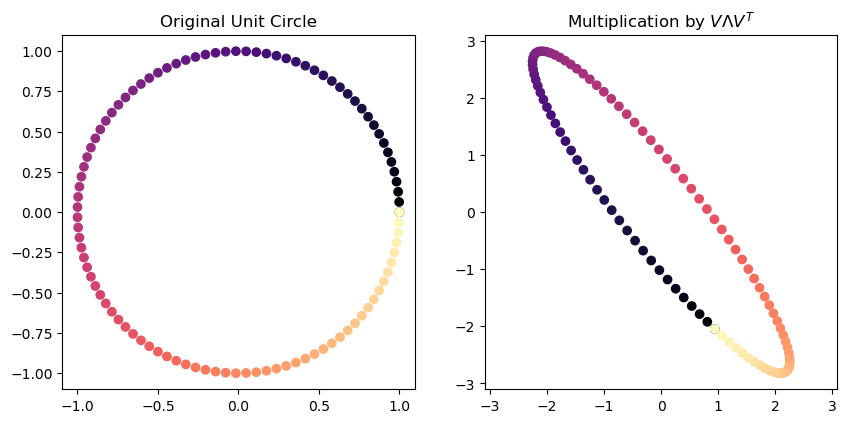

In [18]:
# x and Ax
phi = np.linspace(0, 2*np.pi, 100)
x = np.cos(phi)
y = np.sin(phi)

XX = np.vstack((x[None, :], y[None, :]))
Ax = (A @ XX)[0, :]
Ay = (A @ XX)[1, :]

fig = plt.figure(figsize=(10, 4.6))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(x, y,cmap='magma',c=phi)
ax0.set_title('Original Unit Circle')
ax1.scatter(Ax, Ay,cmap='magma',c=phi)
ax1.set_title('Multiplication by $V \Lambda V^T$')
ax0.set_xlim([-2,2])
ax0.axis('equal')
ax1.set_xlim([-2,2])
_=ax1.axis('equal')

In [19]:
Lambda

array([[-0.66841051,  0.        ],
       [ 0.        ,  3.54693669]])

## Key take-home message

> *Matrix Application on a Vector*:
>
>When a matrix $A$ is applied to a vector $x$, it transforms $x$ by rotating and scaling it.

> *Role of Eigenvalues*:
>
> A vector aligned with an eigenvector is scaled by the magnitude of the corresponding eigenvalue.
>
>The larger the absolute value of an eigenvalue, the more stretching or compression the vector undergoes in the direction of the corresponding eigenvector.

>*Role of Eigenvectors*:
>
>Eigenvectors determine the directions of this scaling.
If $x$ is an eigenvector, then $A$ only stretches or compresses $x$ without rotating it.

<a id='Probability'></a>
# Probability


### Random varaible
Toss a coin $\omega\in\Omega=\{\text{heads},\text{tails}\}$ and we define a function $y(\omega)$ as
$$
y(\omega)=\begin{cases}1 \quad \text{if $\omega=$ heads} \\
0 \quad \text{if $\omega=$ tails}
\end{cases}
$$

If the coin is an unfair coin with probability $p_0$ for heads up and $1-p_0$ for tails up, the probability distribution of random variable $y$ reads
$$
\mathbb{P}(y=1)=p_0,\\
\mathbb{P}(y=0)=1-p_0.
$$

In [20]:
import imageio.v2 as imageio
img_heads = imageio.imread('img/heads.png')
img_tails = imageio.imread('img/tails.png')


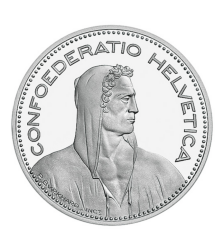

In [21]:
plt.figure(figsize=(4, 3))
y=np.random.binomial(1,p=0.9)
if y==1:
    plt.imshow(img_heads)
else:
    plt.imshow(img_tails)
img=plt.axis('off')

###  Random vector
Imagine you have 10 coins and toss them together 
$$y=[y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9]$$

<img src="./img/coins.png" alt="Drawing" style="width: 400px;"/>

**Implementation**
* We use np.random.binomial() to simulate the tossing of a coin. By choosing the number of elements as 1, we can simulate the tossing of a single coin. 
* You can use np.random.seed() to set the seed for the random number generator. This will ensure that the random numbers generated are the same every time you run the code. Helpful for <span style="color:red">**debugging purposes** </span>..



In [22]:
toss_coin = np.random.binomial(1,size=1,p=0.5)
toss_coin

array([1])

Number of heads: 9


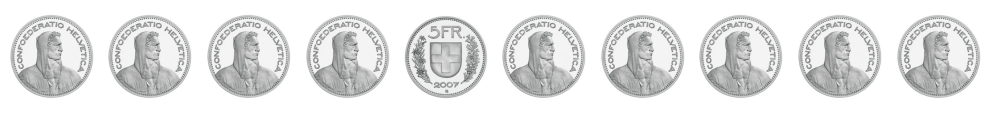

In [23]:
toss_10_coins = np.random.binomial(1,size=10,p=0.5)

fig, ax = plt.subplots(1, 10,figsize=(10, 5))
for i in range(10):
    if toss_10_coins[i]==1:
        ax[i].imshow(img_heads)
    else:
        ax[i].imshow(img_tails)
    ax[i].axis('off')
plt.tight_layout()
print('Number of heads:', toss_10_coins.sum())

## Central limit theorem
* Recall that the binomial distribution is the distribution of the number of heads when we toss a coin $n$ times.
* As $n$ increases the binomial distribution approaches a normal distribution.
That is 
$$
\lim_{n\rightarrow \infty} \frac{\# \text{Heads} - pN}{\sqrt{N}} \sim \mathcal{N}(0,p(1-p))
$$

* Lets look at the distribution of the number of heads when we toss 1000 coins 100000 times. 
* we can use histogram to visualize the distribution of the number of heads.


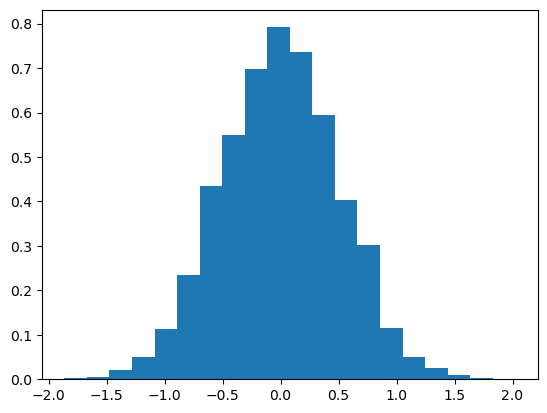

In [24]:
# (number of heads- p*N)/sqrt(N) will follow the normal distribution: Central Limit Theorem
R=[]
repeat=10000
N=1000
for i in range(repeat):
    y=np.random.binomial(1,size=N,p=0.5)
    R.append((y.sum()-0.5*N)/np.sqrt(N))
#_=plt.hist(R,bins=30)
_=plt.hist(R,bins=20,density=True)  

Normal distribution $\mathcal{N}(\mu,\sigma^2)$:
$$p(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{(x-\mu)^2/2\sigma^2}$$

Only two paramters:

Mean: $\mu=\mathbb{E}[x]=\int x p(x)\mathrm{d}x$.

Variance: $\sigma^2=\mathbb{E}[(x-\mu)^2]= \int (x-\mu)^2 p(x)\mathrm{d}x$.



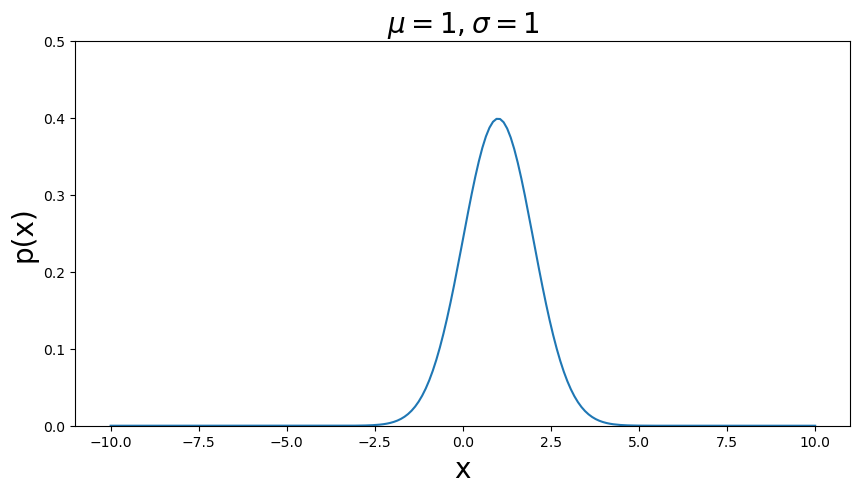

In [25]:
fig, (ax1) = plt.subplots(1, 1,figsize=(10,5))

mu,sigma=1,1
xList=np.linspace(-10,10,200)

p = lambda x,mu,sigam : 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)/sigma)**2/2)

ax1.plot(xList,p(xList,mu,sigma))
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('p(x)',fontsize=20)
ax1.set_title(r'$\mu=1,\sigma=1$',fontsize=20)
_=ax1.set_ylim([0,0.5])

Sample from a normal distribution

$$x \sim \mathcal{N}(0,1)$$

**Implementation**
* Either you can use np.random.normal() to sample from a normal distribution.
* There are many ways to sample the data from a normal distribution. You can use the one that is most convenient for you.


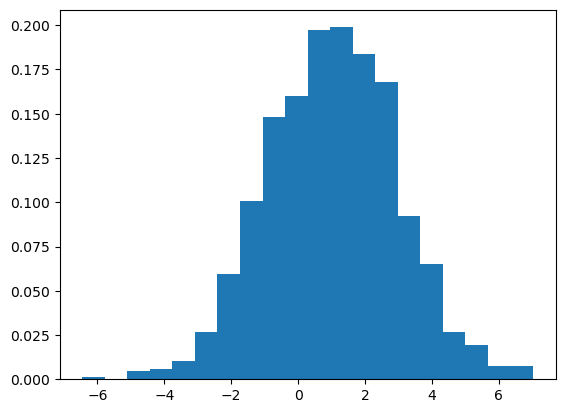

In [26]:
mu, sigma = 1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
_=plt.hist(s,bins=20,density=True)  

# Joint distribution

The joint distribution: represents the probability distribution of two random variables (or more) occurring simultaneously. 

$$
p(x,y)
$$
Conditional probability distribution: describes the probability of $x$ given that $y$ has occurred; quantifies how 
$x$ is distributed when we have specific information about $y$.
$$
p(x|y), \quad \text{or} \quad p(x|y=1).
$$

Independent: if two random variables $x$ and $y$ are independent then the joint probability of both occurring is the product of their individual probabilities.

$$
p(x,y)=p(x)p(y)
$$

Not independent:

$$
p(x,y)\neq p(x)p(y)
$$

Covariance: measures the degree to which two random variables change together. 

$$
\mathrm{Cov}(x,y)=\mathbb{E}\left[\left(x-\mathbb{E}[x]\right)\left(y-\mathbb{E}[y]\right)\right].
$$

Covariance of independent variables: For two independent variables, their covariance is zero.
$$
\mathrm{Cov}(x,y)=\mathbb{E}\left[\left(x-\mathbb{E}[x]\right)\right]\mathbb{E}\left[\left(y-\mathbb{E}[y]\right)\right]=0\times0.
$$


**Note:** In general zero covariance does not imply independence. But if the variables are jointly Gaussian, then zero covariance implies independence.

### Multivariate normal distribution
The multivariate normal distribution extends the concept of the univariate normal distribution to multiple variables. In the context of two variables, \($x_1$\) and \($x_2$\), their joint distribution is represented as:
$$
p(x_1,x_2)
$$
$$
x_1 \sim \mathcal{N}(\mu_1,\sigma_1^2) \quad x_2 \sim \mathcal{N}(\mu_2,\sigma_2^2).
$$

$$
x= \begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}, \quad \mu= \begin{bmatrix}
\mu_1 \\
\mu_2 
\end{bmatrix},   \quad \Sigma=\begin{bmatrix}
\mathrm{Cov}(x_1,x_1) & \mathrm{Cov}(x_1,x_2) \\
\mathrm{Cov}(x_2,x_1)  & \mathrm{Cov}(x_2,x_2) 
\end{bmatrix}.
$$

$$p(x_1,x_2)=\frac{\exp \left(-\frac{1}{2}({x}-{\mu})^{\mathrm{T}} {\Sigma}^{-1}({x}-{\mu})\right)}{\sqrt{(2 \pi)^k|{\Sigma}|}}$$

**Implementation**
* numpy provides a function np.random.multivariate_normal() to sample from a multivariate normal distribution. You need to provide the mean and covariance matrix as input to the function.

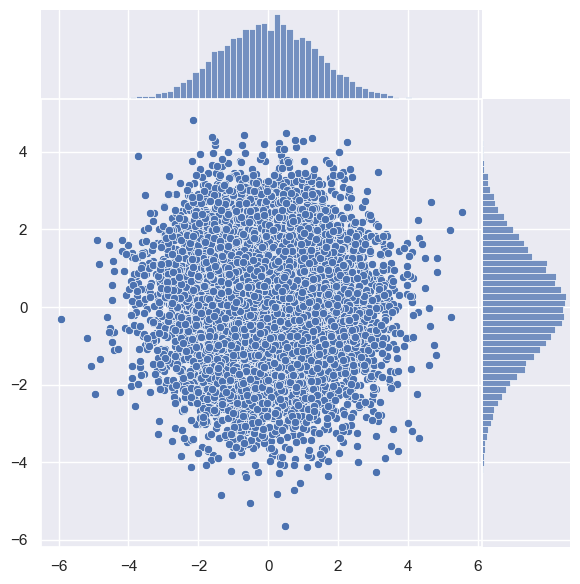

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Mean
Mu = np.array([0, 0]).reshape(2, 1)

# Covariance
Sigma = np.array([[2, 0],
                  [0, 2]])

N=10000

z = np.random.multivariate_normal(mean=Mu.reshape(2,), cov=Sigma, size=N)
y = np.transpose(z)
sns.jointplot(x=y[0], y=y[1], space=0);

**Observation**
* Using a covariance matrix with non-zero off diagonal elements will gives us a distribution which looks like an ellipse rotated by some angle.
* This shows that there is some correlation between the two variables.

<a id='Additional'></a>
# Additional learning material

The following material shows an extended version of the matrix product's visualization that we discussed above. Also some explanation about QR decomposition and Cholesky decomposition is given.

As we know $A = V \Lambda V^\top$, lets look at what each of these matrices do to the unit circle.


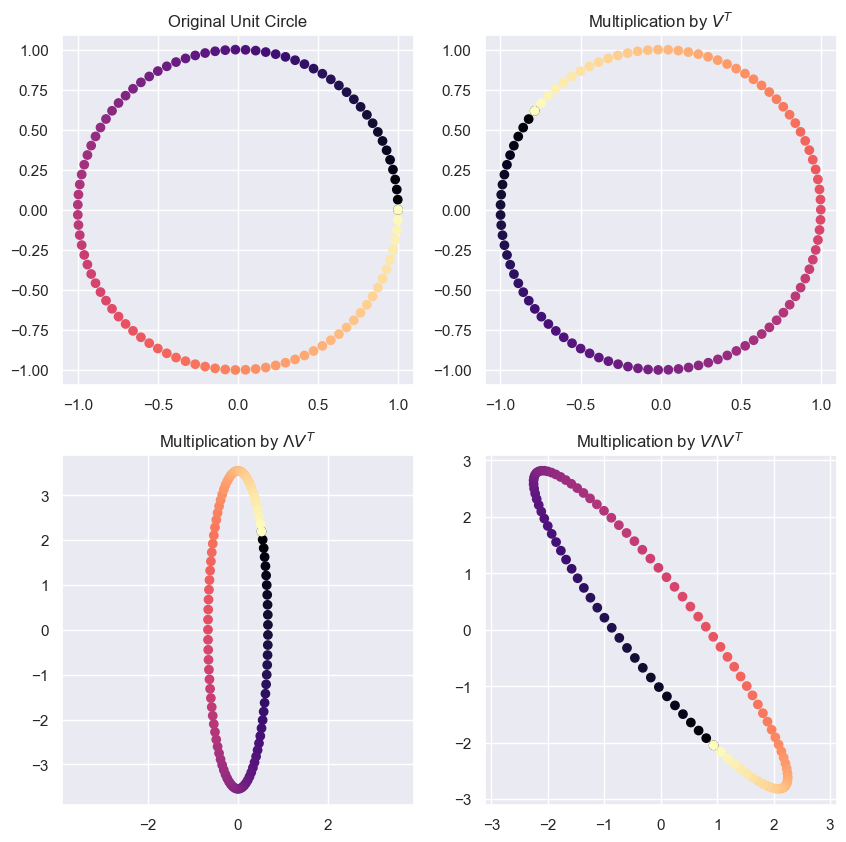

In [28]:
#x, V.T@X, Lambda@V.T@X, V@Lambda@V.T@X

phi = np.linspace(0, 2*np.pi, 100)
x = np.cos(phi)
y = np.sin(phi)

XX = np.vstack((x[None, :], y[None, :]))
Ax = (A @ XX)[0, :]
Ay = (A @ XX)[1, :]

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
ax0.scatter(x, y,cmap='magma',c=phi)
ax0.set_title('Original Unit Circle')
ax1.scatter((V.T@XX)[0, :], (V.T@XX)[1, :],cmap='magma',c=phi)
ax1.set_title('Multiplication by $V^T$')

ax2.scatter((Lambda@V.T@XX)[0, :], (Lambda@V.T@XX)[1, :],cmap='magma',c=phi)
ax2.set_title('Multiplication by $\Lambda V^T$')
ax3.scatter((V@Lambda@V.T@XX)[0, :], (V@Lambda@V.T@XX)[1, :],cmap='magma',c=phi)
ax3.set_title('Multiplication by $V \Lambda V^T$')

ax0.set_xlim([-2,2])
ax0.axis('equal')
ax1.set_xlim([-2,2])
ax1.axis('equal')
ax2.set_xlim([-2,2])
ax2.axis('equal')
ax3.set_xlim([-2,2])
_=ax3.axis('equal')

**Observations**
 <details>
  <summary style="list-style: none;" >
  
   $V^\top$ rotates the unit circle (Why?)
  
  </summary>
  
  * $V^\top$  is a orthogonal matrix, so it preserves the length of the vectors. This means that the unit circle will remain a unit circle after 
  it is operated on by $V^\top$, so the only thing that $V^\top$ can do to the unit circle is rotate it.

</details>

<details>
  <summary style="list-style: none;">
  
  $\Lambda$ scales the unit circle (Why?)
  
  </summary>

  * $\Lambda$ is a diagonal matrix, so it scales the unit circle along the axes. The scaling factor along the $i^{th}$ axis is $\lambda_i$. Thus 
  the unit circle is scaled by $\lambda_i$ along the $i^{th}$ axis, but does not rotate.
</details>

<details>

<summary style="list-style: none;">

$V$ also rotates the output (Why?)

</summary>

* $V$ is also a orthogonal matrix as transpose doesn't change the orthogonality. So it also rotates the output of $\Lambda V^T$.

</details>


#### Direction of eigenvector
* The eigenvalues tell us the magnitude of the scaling of the unit circle along the eigenvector. The eigenvalue with maximum magnitude will tell us the direction of the eigenvector along which the unit circle is scaled the most. 
* The maximum / minimum magnitude of the unit circle after operating with $A$ is the maximum / minimum   absolute eigenvalue of $A$.

### QR decomposition

This is another way to decompose a matrix $A$ into a product of two matrices $Q$ and $R$. Where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

$$
A=QR
$$
We naturally sperate the $Ax$ into $2$ steps:
$$
Ax=Q\left(Rx\right)
$$


We can use the QR decomposition to solve the linear system $Ax=b$. We can write $Ax=b$ as $QRx=b$. 

Since $Q$ is an orthogonal matrix, we can multiply both sides by $Q^\top$ to get $Rx=Q^\top b$. 

Since $R$ is an upper triangular matrix, we can solve for $x$ by back substitution.


**Implementation**
* np.linalg.qr() returns the QR decomposition of a matrix.


In [29]:
x = np.random.rand(2,1)
A = np.random.randn(2, 2)
A += A.T
Q, R = np.linalg.qr(A)

In [30]:
Q@R

array([[-1.07957514, -0.86165864],
       [-0.86165864,  3.30594561]])

In [31]:
A

array([[-1.07957514, -0.86165864],
       [-0.86165864,  3.30594561]])

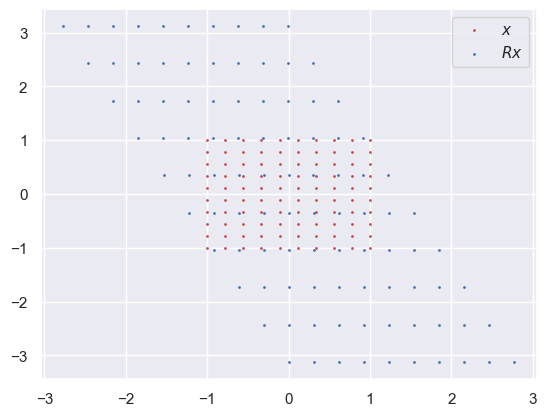

In [32]:
x_ = np.linspace(-1, 1, 10)
y_ = np.linspace(-1, 1, 10)

xx, yy = np.meshgrid(x_, y_)
xx = xx.flatten()
yy = yy.flatten()

X = np.vstack((xx[None, :], yy[None, :]))

plt.scatter(xx, yy, s=1,color='r',label=r'$x$')



Rxx = (R @ X)[0, :]
Ryy = (R @ X)[1, :]


plt.scatter(Rxx, Ryy, s=1,color='b',label=r'$Rx$')


# Qxx = (Q @ X)[0, :]
# Qyy = (Q @ X)[1, :]


# plt.scatter(Qxx, Qyy, s=1,color='y',label=r'$Qx$')


# Axx = (A @ X)[0, :]
# Ayy = (A @ X)[1, :]


# plt.scatter(Axx, Ayy, s=1,color='g',label=r'$Ax$')


plt.legend()

####  Cholesky decomposition.

This is another way to decompose a matrix $A$ into a product of two matrices $L$ and $L^\top$. Where $L$ is a lower triangular matrix. 

Remember that a matrix $A$ has to be symmetric and positive definite for it to have a Cholesky decomposition.  That is:
* $A$ is symmetric: $A = A^\top$
* $A$ is positive definite: $x^\top Ax > 0$ for all $x \neq 0$
Then we can write $A$ as:
$$
A=LL^\top
$$

This is useful for solving the linear system $Ax=b$, in an efficient manner. We can write $Ax=b$ as $LL^\top x=b$. Let $$y=L^\top x$$
Then we can solve for $y$ by forward substitution and then solve for $x$ by back substitution.

#### Sample from Multivariate normal distribution
Standard i.i.d normal distribution: $x\in \mathbb{R}^{2}$
 $$
   x \sim \mathcal{N}\left(\begin{bmatrix}
0 \\
0 
\end{bmatrix}, \begin{bmatrix}
1 & 0 \\
0  & 1 
\end{bmatrix}\right),
 $$

$$Lx+\mu \sim \mathcal{N}(\mu, \Sigma),$$

where $\Sigma=LL^\top$.

* This gives us a way to sample from a multivariate normal distribution with any mean and covariance matrix.
* You can use np.random.randn() to sample from a standard normal distribution and then use the above formula to get a sample from a multivariate normal distribution with any mean and covariance matrix.

In [33]:
#  Cholesky decomposition.
L = np.linalg.cholesky(Sigma)

In [34]:
L@L.T

array([[2., 0.],
       [0., 2.]])

In [35]:
Sigma

array([[2, 0],
       [0, 2]])

* An example to sample from a multivariate normal distribution with mean $\mu=[1,2]$ and covariance matrix $\Sigma$ using standard normal distribution.


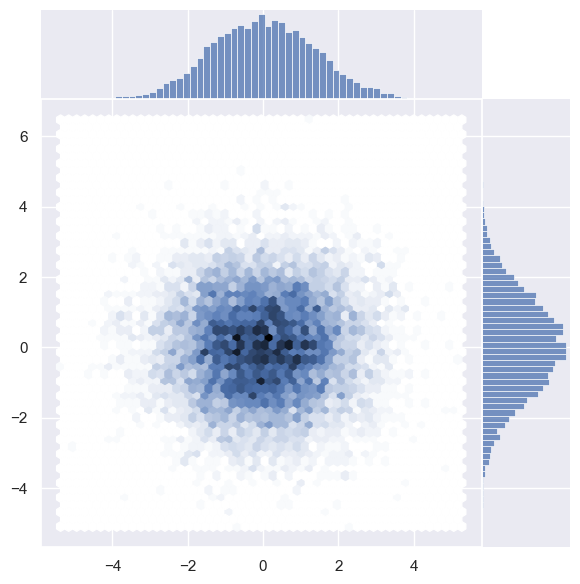

In [36]:
N = 10000

x = np.random.randn(2,N)

x = Mu + L@x


sns.jointplot(x=x[0], y=x[1],kind='hex', space=0);

**Question**
* Why sampling $2*N$ points and arrangeing them in a $2\times N$ matrix gives us $N$ samples from a standard multivariate normal distribution ?

## Discussion  and Exercise

<a id='Discussion_and_exercise1'></a>
1. Given a set of vectors $\{x_0,x_1,\ldots,x_n\}$, check whether a new vector $y$ is in the vector space spanned by $\{x_0,x_1,\ldots,x_n\}$.

 <a id='Discussion_and_exercise2'></a>

2. Compute the projection matrix for the vector space spanned by $\{x_0,x_1,\ldots,x_n\}$.

<a id='Discussion_and_exercise3'></a>

3. Prove $Lx+\mu \sim \mathcal{N}(\mu, \Sigma)$, where $x$ is sampled from standard i.i.d multivariate normal distribution and $Σ=𝐿𝐿^\top$. Is $L$ unique?
